<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module and load the dataset into a dataframe



In [1]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## 1. Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Density'>

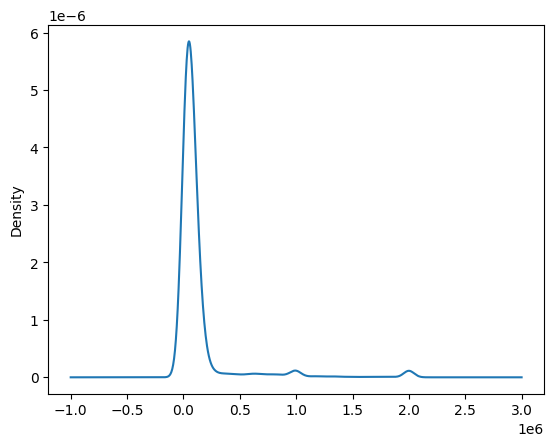

In [4]:
df['ConvertedComp'].plot(kind='density')

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

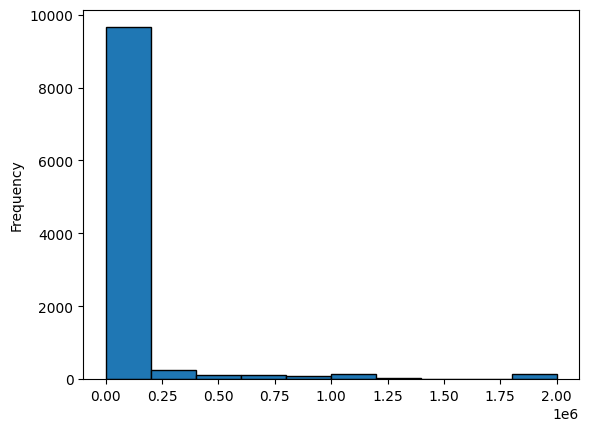

In [16]:
df['ConvertedComp'].plot(kind='hist', bins=10, edgecolor='black')

What is the median of the column `ConvertedComp`?


In [6]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [19]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: xlabel='Age', ylabel='Frequency'>

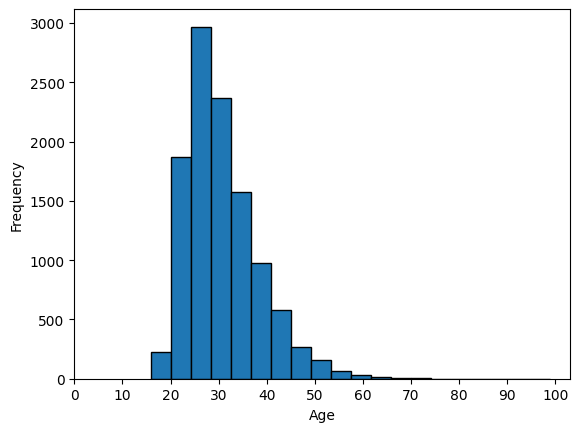

In [27]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black', xticks=[n for n in range(0,110,10)], xlabel='Age')

## 2. Outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


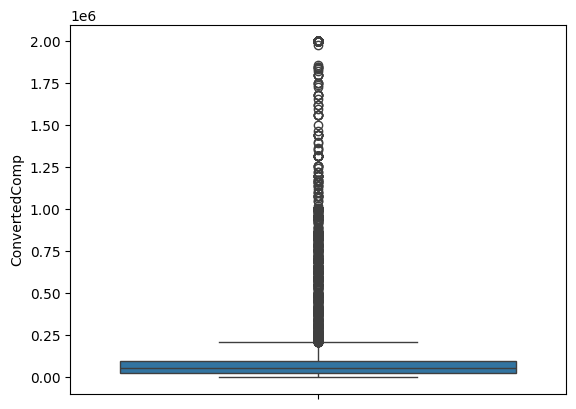

In [37]:
import seaborn as sns, matplotlib.pyplot as plt
sns.boxplot(data=df['ConvertedComp'])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [33]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3-q1
print(f"Inter Quartile Range: {iqr}")

Inter Quartile Range: 73132.0


Find out the upper and lower bounds.


In [41]:
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [43]:
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)] # can't be lower than lower_bound
outliers.shape[0] # num of outliers in the ConvertedComp column

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [45]:
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Old mean: {df['ConvertedComp'].mean()}\nNew mean: {new_df['ConvertedComp'].mean()}")
print(f"Old median: {df['ConvertedComp'].median()}\nNew median: {new_df['ConvertedComp'].median()}")

Old mean: 131596.7316197316
New mean: 59883.20838915799
Old median: 57745.0
New median: 52704.0


## 3. Correlation


Find the correlation between `Age` and all other numerical columns.


In [49]:
num_df = df.select_dtypes(include=['number']) # new df of only the numerical columns
num_df.corr()['Age'] # correlations for Age

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64